### Regression

##### 圖表

In [13]:
import matplotlib.pyplot as plt
from math import sqrt
def picture(loss,val_loss):
    if(loss=='root_mean_squared_error'):
        mse_loss='loss'
        val_mse_loss='val_loss'
        temp=[]
        for i in range(len(model_train.history[mse_loss])):
            temp.append(sqrt(model_train.history[mse_loss][i]))
        model_train.history[loss]=temp
        temp=[]
        for i in range(len(model_train.history[val_mse_loss])):
            temp.append(sqrt(model_train.history[val_mse_loss][i]))
        model_train.history[val_loss]=temp        

#### Data Preprocessing

In [121]:
import keras as ks
import pandas as pd
import numpy as np
#匯入adult file
wine_quality= pd.read_csv("C:\\Users\\user\\Desktop\\課程\\Machine Learning\\程式作業\\WineQT.csv")

#印出adult的資料結構
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [122]:
X = wine_quality.drop("total sulfur dioxide", axis=1)
y = wine_quality[["total sulfur dioxide"]] ##總二氧化硫
y

,total sulfur dioxide
0,170.0
1,132.0
2,97.0
3,186.0
4,186.0
...,...
6492,44.0
6493,51.0
6494,40.0
6495,44.0


In [123]:
#切割資料集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15, random_state=6666)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

5522
5522
975
975


In [124]:
#切割訓練集&驗證集(70%、15%)
size=(3/17)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=size, random_state=6666)
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

4547
4547
975
975


In [125]:
#正規化
from sklearn.preprocessing import StandardScaler
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_val -= mean
X_val /= std
X_test -= mean
X_test /= std

X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
2023,-0.697665,-0.781659,-0.263859,-0.825102,-0.139481,0.868432,-0.636221,0.054010,-0.760264,-0.323946,0.214100
1511,1.227380,-0.661812,2.891251,-0.468108,-0.395708,-0.866463,-0.437321,-1.255603,-0.155449,0.606443,0.214100
5506,2.228403,1.854968,0.353446,-0.069114,1.540229,-1.090320,2.612484,0.615273,0.718173,-0.070204,0.214100
2827,-0.620663,-1.201122,-0.058091,-0.888101,-0.623465,1.260182,-1.285962,0.989448,-1.230676,0.860186,1.363466
1274,0.919373,0.057268,1.656643,1.757858,-0.224890,1.372111,1.518532,-0.943790,0.314963,-0.916012,0.214100
...,...,...,...,...,...,...,...,...,...,...,...
4477,-0.620663,-0.122502,-0.401037,0.518877,-0.167950,1.260182,0.139490,-0.507253,-0.222651,-0.746851,-0.935266
225,-0.081650,-0.601889,0.627803,2.597845,-0.281829,0.476681,1.684282,0.615273,-0.961869,-1.508078,-0.935266
2205,0.380360,0.296961,0.147678,0.959870,0.002868,0.252824,0.888681,0.241098,0.449366,-0.239366,-0.935266
2877,-0.543661,-1.141199,1.588054,0.098884,-0.310299,2.491398,0.033410,-1.567415,-0.894668,-1.000593,-0.935266


#### 建立神經網路架構

In [133]:
X_train.shape[1]

11

In [132]:
# 建立神經網路架構
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,BatchNormalization,Dropout
# 建構模型
model = Sequential()                                   
model.add(Dense(168,activation='relu',input_shape=(X_train.shape[1],)))# 增加一層神經層, 使用 ReLU 激活函數, 輸入層有11個輸入特徵
# model.add(BatchNormalization())
model.add(Dense(168,activation='relu',name='the_second_layer'))  # 增加一層神經層, 使用 ReLU 激活函數
model.add(Dense(168,activation='relu',name='the_third_layer'))
model.add(Dense(168,activation='relu',name='the_fourth_layer'))
model.add(Dense(168,activation='relu',name='the_fifth_layer'))
model.add(Dense(168,activation='relu',name='the_sixth_layer'))
model.add(Dense(168,activation='relu',name='the_seventh_layer'))
##======================================================================##
# model.add(BatchNormalization())
# model.add(Dense(168,activation='relu',name='the_third_layer'))
# # model.add(BatchNormalization())
# model.add(Dense(168,activation='relu',name='the_fourth_layer'))
# model.add(BatchNormalization())
# model.add(Dense(168,activation='relu',name='the_fifth_layer'))
# # model.add(BatchNormalization())
# model.add(Dense(168,activation='relu',name='the_sixth_layer'))
# model.add(BatchNormalization())
# # model.add(Dropout(0.9))
# model.add(Dense(168,activation='relu',name='the_seventh_layer'))
# # model.add(BatchNormalization())
##======================================================================##
model.add(Dense(1,name='Output_Layer'))
## 編譯模型
model.compile(optimizer='adam',loss='mse',metrics=['mae','mape'])

#模型訓練
#設定early stopping
threshold = 30
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=threshold, monitor = 'val_loss'),
        tf.keras.callbacks.LearningRateScheduler(
        lambda epoch: 1e-3 * 10 ** (epoch / 30)
    )
]

model_train = model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=200, batch_size=64,callbacks=[my_callbacks],verbose=1)
print(f"訓練最好的Epoch{len(model_train.history['val_loss'])-threshold}，val_loss:{model_train.history['val_loss'][(len(model_train.history['val_loss'])-threshold)-1]}/val_mae:{model_train.history['val_mae'][(len(model_train.history['val_mae'])-threshold)-1]}/val_mape:{model_train.history['val_mape'][(len(model_train.history['val_mape'])-threshold)-1]}")


Epoch 1/200
72/72 [==============================] - 2s 12ms/step - loss: 5524.8921 - mae: 55.7485 - mape: 66.1215 - val_loss: 1884.0511 - val_mae: 32.9489 - val_mape: 42.3963 - lr: 0.0010
Epoch 2/200
72/72 [==============================] - 1s 8ms/step - loss: 1711.3265 - mae: 31.4678 - mape: 41.6728 - val_loss: 1335.6982 - val_mae: 27.2629 - val_mape: 32.2483 - lr: 0.0011
Epoch 3/200
72/72 [==============================] - 0s 7ms/step - loss: 1176.2604 - mae: 26.0372 - mape: 32.4563 - val_loss: 1136.5116 - val_mae: 26.8758 - val_mape: 37.8512 - lr: 0.0012
Epoch 4/200
72/72 [==============================] - 1s 9ms/step - loss: 895.6581 - mae: 22.8588 - mape: 27.9826 - val_loss: 862.5485 - val_mae: 22.9007 - val_mape: 31.9160 - lr: 0.0013
Epoch 5/200
72/72 [==============================] - 0s 6ms/step - loss: 805.8678 - mae: 21.6395 - mape: 27.5152 - val_loss: 933.6702 - val_mae: 24.8879 - val_mape: 38.8974 - lr: 0.0014
Epoch 6/200
72/72 [==============================] - 0s 6ms/ste

##### Network Structure

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                768       
                                                                 
 the_second_layer (Dense)    (None, 64)                4160      
                                                                 
 Output_Layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


##### 作圖

In [134]:
picture('root_mean_squared_error','val_root_mean_squared_error')

In [111]:
training_set4

,loss,val_loss,mae,val_mae,mape,val_mape,root_mean_squared_error,val_root_mean_squared_error
0,5514.995605,1866.785767,55.310093,32.900757,66.406006,42.076538,74.263016,43.206316
1,1663.454224,1418.778442,31.094988,29.612923,42.149704,41.611717,40.785466,37.666675
2,1169.399292,974.220764,26.135900,23.815220,33.487175,29.733128,34.196481,31.212510
3,869.013672,784.729187,22.468908,21.897984,28.533611,31.274757,29.479038,28.013018
4,756.719421,729.885986,20.958712,20.086180,26.779352,25.314177,27.508534,27.016402
5,683.207886,813.920593,19.867664,20.370161,24.608856,22.854946,26.138246,28.529294
6,683.629456,1037.121948,19.908230,25.429089,24.156366,30.050470,26.146309,32.204378
7,692.947144,681.447754,19.982487,20.073154,23.739458,26.110193,26.323889,26.104554
8,628.246460,798.069763,18.974567,21.678595,22.803860,25.755993,25.064845,28.250129
9,590.742798,1690.865723,18.236937,33.879906,21.857531,39.514408,24.305201,41.120138


In [109]:
history_df

,loss,val_loss,mae,val_mae,mape,val_mape,root_mean_squared_error,val_root_mean_squared_error
0,9548.651367,3264.634766,81.966087,43.569492,73.601364,43.450439,97.717201,57.136982
1,1266.146729,2656.190186,26.652285,41.550602,34.544079,43.742779,35.582956,51.538240
2,1005.770935,1121.375122,23.946672,24.701050,31.198547,28.667208,31.713892,33.486940
3,927.729797,1079.342041,23.289568,24.870150,29.887316,30.550726,30.458657,32.853341
4,930.669983,1165.629395,23.342951,25.058905,30.295391,28.135098,30.506884,34.141315
5,824.592163,918.852234,21.644053,24.025671,26.789303,34.627468,28.715713,30.312576
6,737.362000,1010.280701,20.679749,24.320009,26.729380,27.032946,27.154410,31.784913
7,705.330383,918.552429,20.157116,23.912872,25.066284,33.318253,26.558057,30.307630
8,696.732605,739.960754,20.347958,19.705406,25.407772,25.090364,26.395693,27.202220
9,752.074707,898.502686,20.807137,22.884443,26.394596,31.357594,27.423981,29.975034


In [135]:
history_df = pd.DataFrame({
                            "loss":model_train.history['loss'],
                            "val_loss":model_train.history['val_loss'],
                            "mae":model_train.history['mae'],
                            "val_mae":model_train.history['val_mae'],
                            "mape":model_train.history['mape'],
                            "val_mape":model_train.history['val_mape'],
                            "root_mean_squared_error":model_train.history['root_mean_squared_error'],
                            "val_root_mean_squared_error":model_train.history['val_root_mean_squared_error']})
history_df.to_csv("traing_set_4.csv",sep=',',index=False)

In [138]:
training_set1 = pd.read_csv('traing_set_1.csv')
training_set2 = pd.read_csv('traing_set_2.csv')
training_set3 = pd.read_csv('traing_set_3.csv')
training_set4 = pd.read_csv('traing_set_4.csv')
training_set5 = pd.read_csv('traing_set_5.csv')

In [139]:
import matplotlib.pyplot as plt
def history_output(loss_name,name1,name2):
    plt.figure(figsize =(10,4))
    plt.plot(range(1,len(training_set1[loss_name])+1),training_set1[loss_name],label='training_set1')
    plt.plot(range(1,len(training_set2[loss_name])+1),training_set2[loss_name],label='training_set2')
    plt.plot(range(1,len(training_set3[loss_name])+1),training_set3[loss_name],label='training_set2-1')
    plt.plot(range(1,len(training_set4[loss_name])+1),training_set4[loss_name],label='training_set3')
    plt.plot(range(1,len(training_set5[loss_name])+1),training_set5[loss_name],label='training_set4')
    plt.ylabel(f'{name1}')
    plt.xlabel("epoch")
    plt.title(f'{name2} Predict total sulfur dioxide')

    plt.legend()#可以印出label
    plt.show()

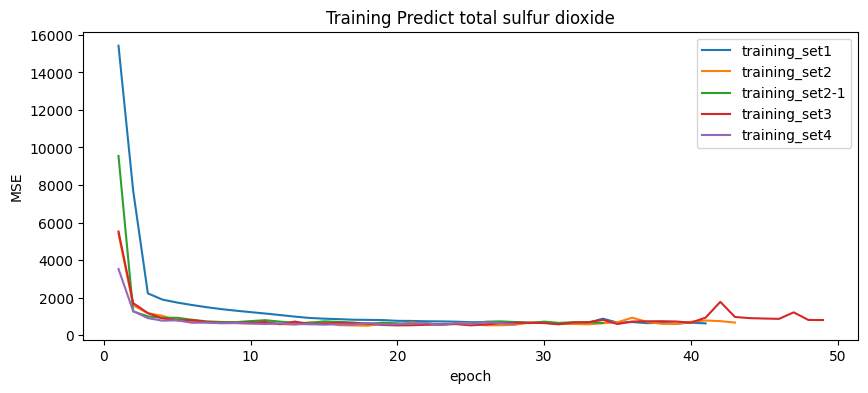

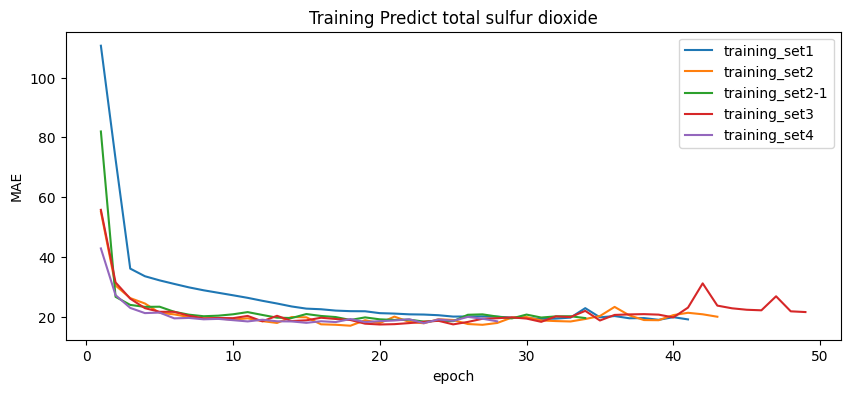

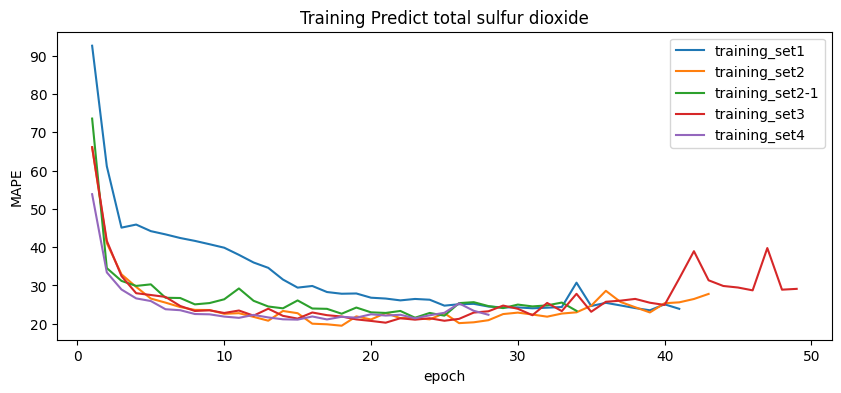

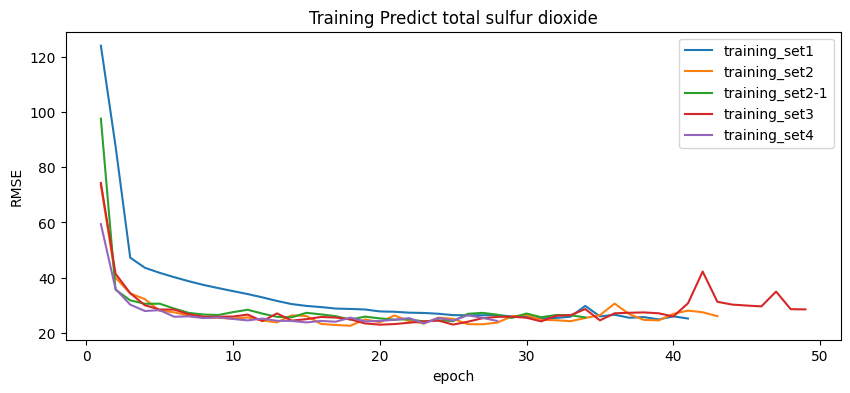

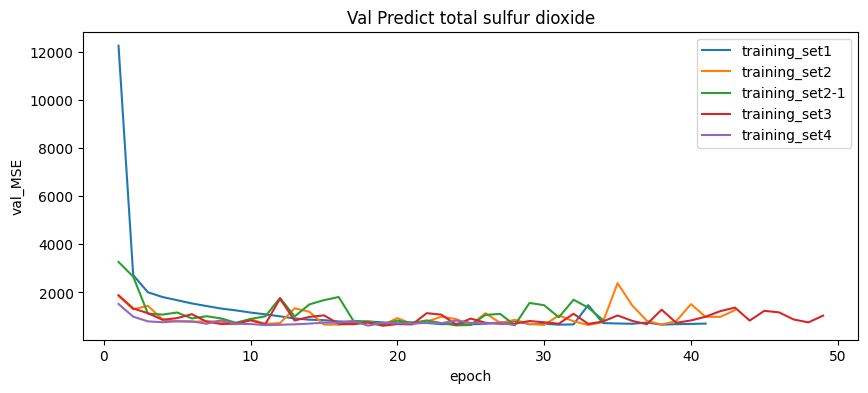

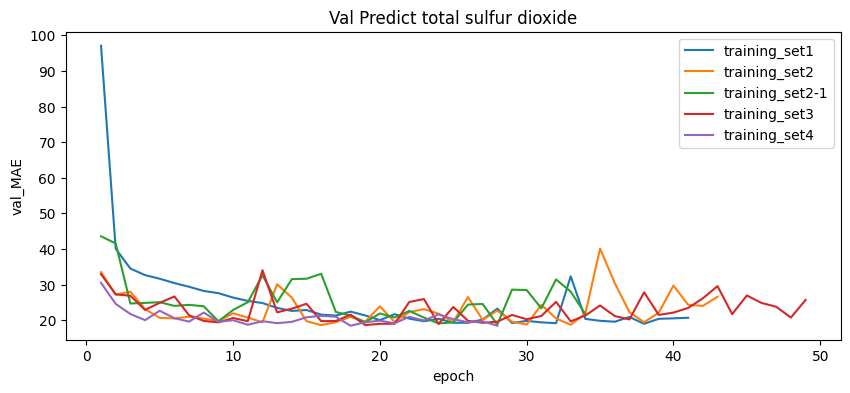

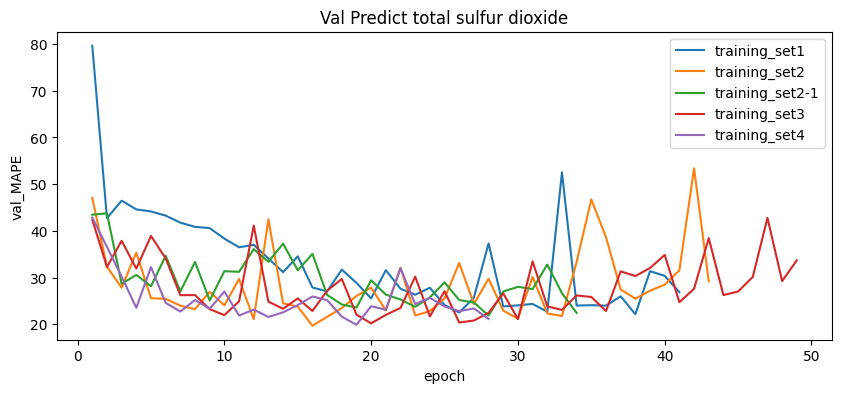

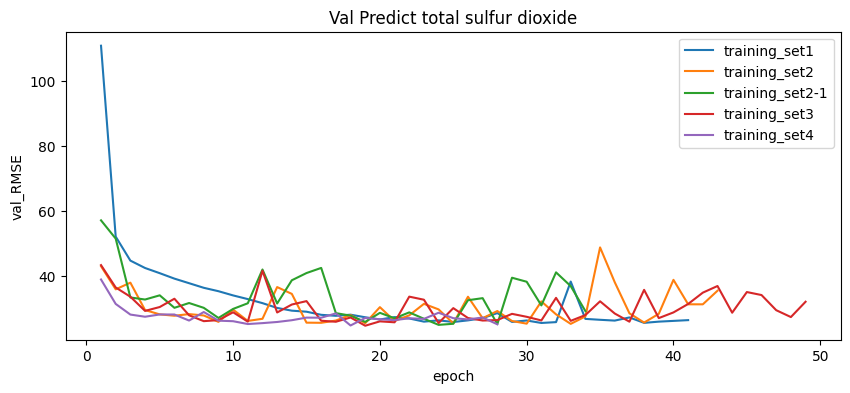

In [140]:
history_output("loss","MSE","Training")
history_output("mae","MAE","Training")
history_output("mape","MAPE","Training")
history_output("root_mean_squared_error","RMSE","Training")

history_output("val_loss","val_MSE","Val")
history_output("val_mae","val_MAE","Val")
history_output("val_mape","val_MAPE","Val")
history_output("val_root_mean_squared_error","val_RMSE","Val")

#### 測試資料評估績效

In [137]:
#測試資料預測
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
test_pred=model.predict(X_test)
print(test_pred)
print("length:",len(test_pred))

error_RMSE = sqrt(mean_squared_error(y_test,test_pred)) #calculate rmse
error_MAE = mean_absolute_error(y_test,test_pred)
error_MAPE = mean_absolute_percentage_error(test_pred,y_test)
print("RMSE:",error_RMSE,end=" ")
print("MAE:",error_MAE,end=" ")
print("MAPE:",error_MAPE)

31/31 [==============================] - 0s 3ms/step
[[ 46.965767]
 [119.212654]
 [ 37.361828]
 [114.14386 ]
 [ 30.640213]
 [ 95.441925]
 [127.41153 ]
 [154.15646 ]
 [156.26952 ]
 [239.10185 ]
 [ 29.882456]
 [125.944954]
 [ 33.4599  ]
 [108.1678  ]
 [245.74722 ]
 [148.43906 ]
 [128.32907 ]
 [219.66837 ]
 [146.30505 ]
 [122.13968 ]
 [149.3771  ]
 [ 38.993267]
 [101.19733 ]
 [124.39648 ]
 [ 34.723465]
 [125.39013 ]
 [126.84759 ]
 [137.57086 ]
 [ 94.7371  ]
 [136.62917 ]
 [179.2235  ]
 [ 32.681187]
 [158.02928 ]
 [ 79.45885 ]
 [ 34.36177 ]
 [219.66837 ]
 [104.62139 ]
 [153.99478 ]
 [181.14784 ]
 [ 42.38371 ]
 [ 31.096724]
 [ 50.534996]
 [219.66837 ]
 [155.36426 ]
 [118.49098 ]
 [134.27887 ]
 [106.20128 ]
 [150.93988 ]
 [153.70917 ]
 [118.75658 ]
 [152.23624 ]
 [ 30.914404]
 [123.46231 ]
 [ 40.12759 ]
 [139.39343 ]
 [153.96632 ]
 [158.02928 ]
 [ 55.68604 ]
 [150.9719  ]
 [147.18462 ]
 [127.24506 ]
 [ 89.98048 ]
 [194.02368 ]
 [199.3777  ]
 [ 32.923523]
 [155.97694 ]
 [ 85.76666 ]
 [146.287

#### The relationship between Learning rate and Loss

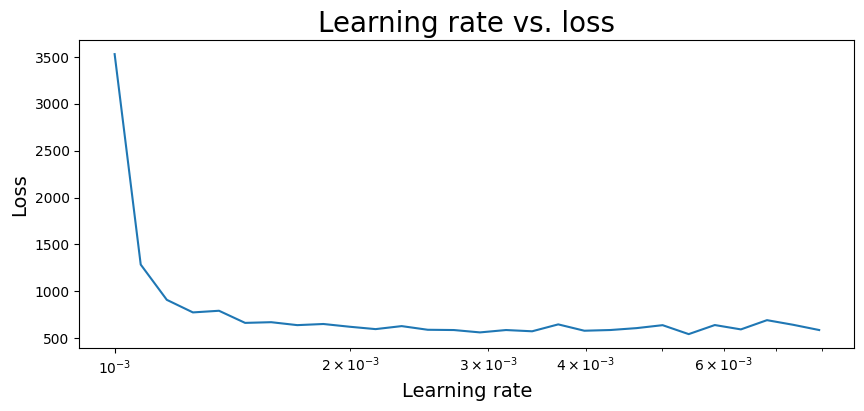

In [118]:
learning_rates = 1e-3 * (10 ** (np.arange(28) / 30))

plt.semilogx(
    learning_rates, 
    training_set5['loss']
    
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14)
plt.show()